In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the diabetes dataset
data = pd.read_csv('diabetes.csv')

# Setting the seed
np.random.seed(42)

In [ ]:
#Task 1

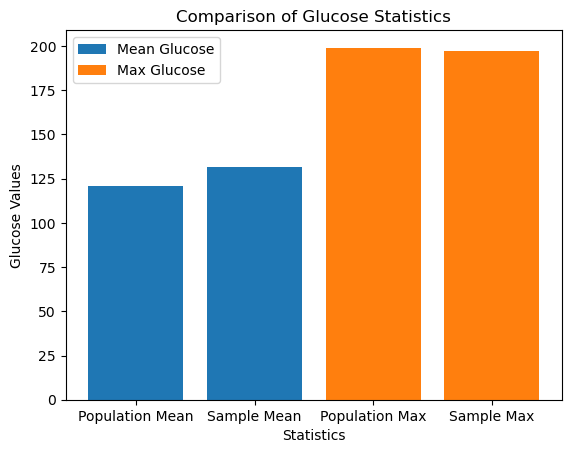

In [ ]:
sample = data.sample(25)

# Population statistics for Glucose
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

# Sample statistics for Glucose
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Plot comparison for Glucose
plt.bar(['Population Mean', 'Sample Mean'], [population_mean_glucose, sample_mean_glucose], label='Mean Glucose')
plt.bar(['Population Max', 'Sample Max'], [population_max_glucose, sample_max_glucose], label='Max Glucose')
plt.xlabel('Statistics')
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics')
plt.legend()
plt.savefig("Visualizations/Comparision_of_Glucose_Statistics.png")
plt.show()

In [ ]:
#Task 2

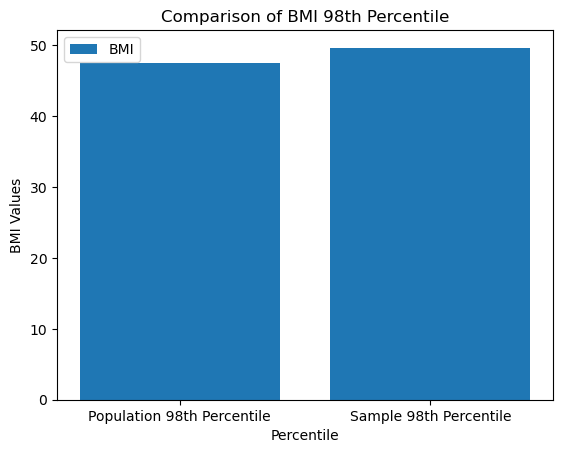

In [ ]:

population_98th_percentile_bmi = np.percentile(data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Plot comparison for BMI percentiles
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'], [population_98th_percentile_bmi, sample_98th_percentile_bmi], label='BMI')
plt.xlabel('Percentile')
plt.ylabel('BMI Values')
plt.title('Comparison of BMI 98th Percentile')
plt.legend()
plt.savefig("Visualizations/Comparision_of_BMI_98th_Percentile.png")
plt.show()

In [ ]:
#Task 3

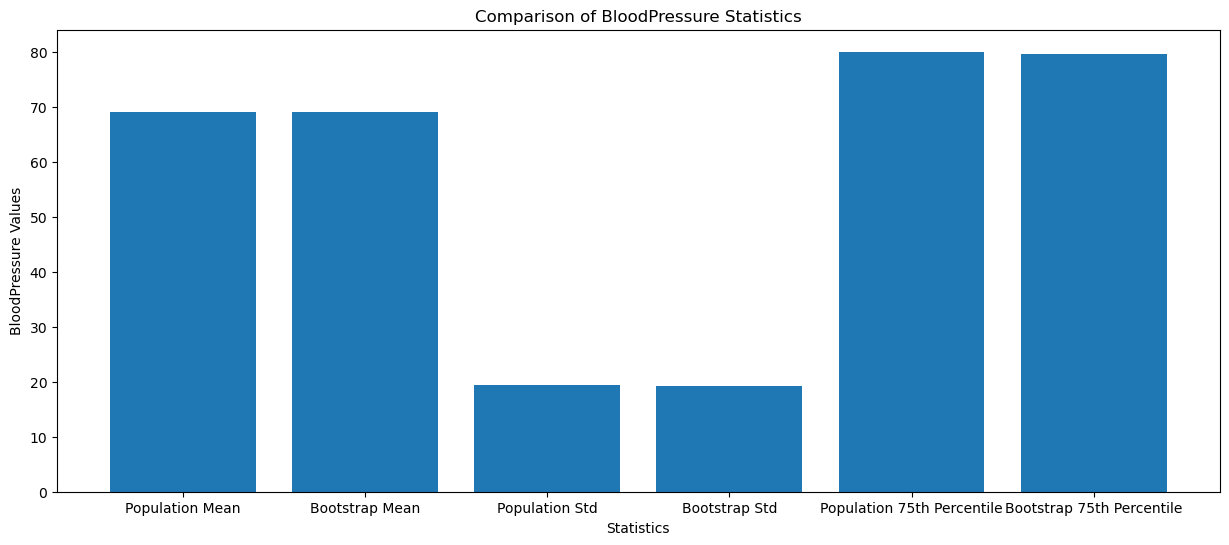

Population Mean BloodPressure: 69.10546875, Bootstrap Mean BloodPressure: 69.07750666666666
Population Std BloodPressure: 19.355807170644777, Bootstrap Std BloodPressure: 19.28877282559243
Population 75th Percentile BloodPressure: 80.0, Bootstrap 75th Percentile BloodPressure: 79.568


In [ ]:

n_bootstrap_samples = 500
bootstrap_sample_size = 150

bootstrap_statistics = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(bootstrap_sample_size, replace=True)
    bootstrap_statistics.append({
        'Mean': bootstrap_sample.mean(),
        'Std': bootstrap_sample.std(),
        'Percentile': np.percentile(bootstrap_sample, 75)  # You can change the percentile as needed
    })

# Calculating the population statistics for BloodPressure
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 75)

# Plot comparison for BloodPressure statistics with a larger chart size
plt.figure(figsize=(15, 6))
plt.bar(['Population Mean', 'Bootstrap Mean', 'Population Std', 'Bootstrap Std', 'Population 75th Percentile', 'Bootstrap 75th Percentile'],
        [population_mean_bp, np.mean([stat['Mean'] for stat in bootstrap_statistics]), population_std_bp, np.mean([stat['Std'] for stat in bootstrap_statistics]), population_percentile_bp, np.mean([stat['Percentile'] for stat in bootstrap_statistics])])
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Statistics')
plt.savefig("Visualizations/Comparision_of_BloodPressure_Statistics.png")
plt.show()

# Resulted values in the comparision
print(f"Population Mean BloodPressure: {population_mean_bp}, Bootstrap Mean BloodPressure: {np.mean([stat['Mean'] for stat in bootstrap_statistics])}")
print(f"Population Std BloodPressure: {population_std_bp}, Bootstrap Std BloodPressure: {np.mean([stat['Std'] for stat in bootstrap_statistics])}")
print(f"Population 75th Percentile BloodPressure: {population_percentile_bp}, Bootstrap 75th Percentile BloodPressure: {np.mean([stat['Percentile'] for stat in bootstrap_statistics])}")